In [14]:
from dataclasses import dataclass
import dice

import numpy as np
import pandas as pd



@dataclass
class Result:
    successes: int = 0
    failures: int = 0

    @property
    def total(self) -> int:
        return self.successes + self.failures

    def success_percentage(self) -> float:
        return self.successes / self.total


def roll(sides: int, target: int, *, max_dice: int = 9, max_ob: int = 4, rolls: int = 10_000) -> pd.DataFrame:
    ds = [i+1 for i in range(max_dice)]
    obs = [i+1 for i in range(max_ob)]

    test_results: dict[tuple[int, int], Result] = {}
    for d in ds:
        for ob in obs:
            test_result = Result()
            for _ in range(rolls):
                successes = dice.pool(d, sides, target)
                if successes >= ob:
                    test_result.successes += 1
                else:
                    test_result.failures += 1
            test_results[(d, ob)] = test_result

    
    data = []
    for d in ds:
        data.append([*(test_results[(d, target)].success_percentage() for target in obs)])

    return pd.DataFrame(
        data=data,
        dtype=np.float64,
        index=[f"{d}D" for d in ds],
        columns=[f"Ob. {ob}" for ob in obs],
    )

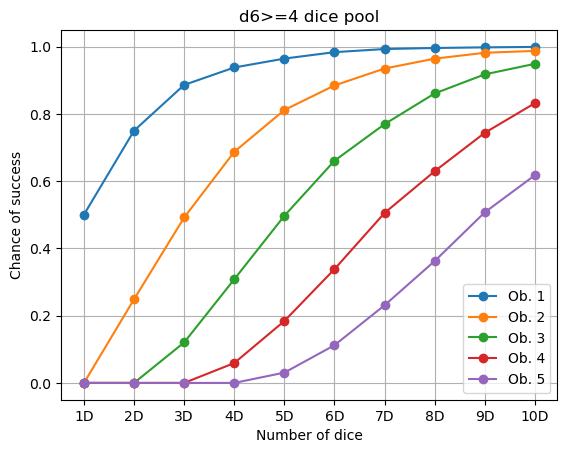

In [44]:
from matplotlib import pyplot as plt

sides = 6
target = 4

max_dice = 10
max_ob = 5

data = roll(sides, target, max_dice=max_dice, max_ob=max_ob)

# plt.plot(data)
plt.title(f"d{sides}>={target} dice pool")
plt.xlabel("Number of dice")
plt.ylabel("Chance of success")
plt.grid()

for i in range(1, max_ob+1):
    plt.plot(data.loc[:,f"Ob. {i}"], label=f"Ob. {i}", color=f"C{i-1}", marker="o")

plt.legend()
plt.show()